In [1]:
# Initialization cell
try:  # for CS1302 JupyterLite pyodide kernel
    import piplite

    with open("requirements.txt") as f:
        for package in f:
            package = package.strip()
            print("Installing", package)
            await piplite.install(package)
except ModuleNotFoundError:
    pass

# Dictionaries and Sets

**CS1302 Introduction to Computer Programming**
___

In [2]:
import random
import matplotlib.pyplot as plt
%reload_ext divewidgets

## Motivation for associative container

The following code simulates the outcomes of rolling a die multiple times.

In [5]:
dice_rolls = [random.randint(1, 6) for i in range(1000)]
# print(*dice_rolls)

**What is the distribution, i.e., fractional counts?**

(0.0, 1.0)

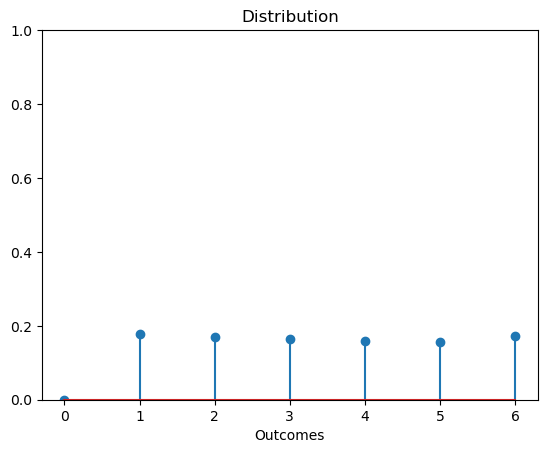

In [6]:
distribution = [dice_rolls.count(i) / len(dice_rolls) for i in range(7)]
plt.stem(range(7), distribution)
plt.xlabel("Outcomes")
plt.title("Distribution")
plt.ylim(0, 1)

In the above code, `distribution[i]` stores the fractional count of outcome `i`.

However, `distribution[0]` is `0` because a dice does not have outcome `0`. Can we avoid such redundancy?

(0.0, 1.0)

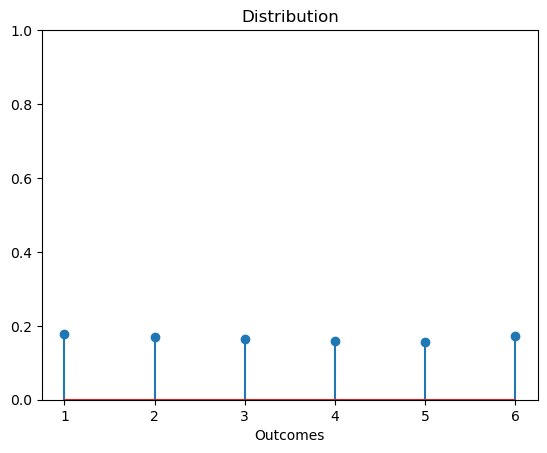

In [7]:
distinct_outcomes = [
    outcome for outcome in range(1, 7) if dice_rolls.count(outcome) > 0
]
distribution = [
    dice_rolls.count(distinct_outcomes[i]) / len(dice_rolls)
    for i in range(len(distinct_outcomes))
]

plt.stem(distinct_outcomes, distribution)
plt.xlabel("Outcomes")
plt.title("Distribution")
plt.ylim(0, 1)

In the above code, 
- `distinct_outcomes` stores the list of distinct outcomes, and
- `distribution[distinct_outcomes[i]]` stores the fractional count of the `i`-th distinct outcome.

What about finding the distribution of characters in an article?  
There are over 1 million unicode characters. Can we:
- Obtain the distribution efficiently without creating an entry for each unicode character?
- Compute the set of distinct characters efficiently without iterating over the set of all unicode characters?
- Access the fractional count of a particular character efficiently without searching through the list of distinct outcomes?
- Index `distribution` directly by the distinct characters in the article?

It is desirable to have a composite data type that
- can keep a set of *unique keys of different types* (such as the characters in our example), and
- associate to different keys possibly different *values of any types* (such as the fractional counts of the characters).

Such a data structure is called an [associative container](https://en.wikipedia.org/wiki/Associative_containers).

**How to use associative containers in python?**

```{important}

There are two built-in classes for associative containers:
- `set` can store unique keys of possibly different types.
- `dict`ionary can store a set of key-value pairs.
```

We have already used sets and dictionaries before.

In [8]:
%%optlite -h 400
a = (lambda **kwargs: kwargs)(start=0, stop=5, step=1)
b = set([1, 1, 2, 3, 3, 3])
assert len(a) == len(b)

OPTWidget(value=None, height=400, script='a = (lambda **kwargs: kwargs)(start=0, stop=5, step=1)\nb = set([1, …

```{note}

Both `set` and `dict` 
- implement the `len` method that returns the number of keys, and
- are mutable, so we can add/remove keys and values and modify their object references.
```

## Constructing associative containers

**How to create a set/dictionary?**

Similar to tuple/list, we can use enclosure, constructors, and comprehension.

**How to create a set/dict by enumerating its keys/values?**

For `dict`, enclose a comma-separated sequence of `key : value` pairs by braces `{` and `}`.

In [9]:
%%optlite -h 400
empty_dictionary = {}
a = {"a": 0, "b": 1}
b = {**a, "c": 0, "d": 1}

OPTWidget(value=None, height=400, script='empty_dictionary = {}\na = {"a": 0, "b": 1}\nb = {**a, "c": 0, "d": …

For `set`, omit `: value`.

In [10]:
%%optlite -h 300
a = {(1, 2.0), print, *range(2), *"23"}
empty_set = {*()}  # Why not use {}?

OPTWidget(value=None, height=300, script='a = {(1, 2.0), print, *range(2), *"23"}\nempty_set = {*()}  # Why no…

We can also create a set/dictionary from other objects using their constructors `set`/`dict`.

In [11]:
%%optlite -l -h 550
empty_set = set()
string2set = set("abc")
range2set = set(range(2))
list2set = set(["abc", range(2)])
set2set = set(list2set)

OPTWidget(value=None, height=550, script='empty_set = set()\nstring2set = set("abc")\nrange2set = set(range(2)…

In [12]:
%%optlite -l -h 650
empty_dict = dict()
enumerate2dict = dict(enumerate("abc"))
zip2dict = dict(zip("abc", "123"))
kwargs2dict = dict(one=1, two=2)
dict2dict = dict(kwargs2dict)

OPTWidget(value=None, height=650, script='empty_dict = dict()\nenumerate2dict = dict(enumerate("abc"))\nzip2di…

**Exercise**

`dict` also has a [*class method* `fromkeys`](https://docs.python.org/3/library/stdtypes.html#dict.fromkeys) to construct a dictionary with keys from iterable pointing to a default value. Create a dictionary using `fromkeys` with keys being the non-negative integers smaller than `100` and values being `0`. 

```{hint}
Use `dict.fromkeys` since a class method is bound to the class rather than an object of the class.
```

In [16]:
dict.fromkeys?
fromkeys_dict = {}.fromkeys(range(0, 100), 0)
# print(fromkeys_dict)
# test
assert all(fromkeys_dict[k] == 0 for k in fromkeys_dict)

Signature: dict.fromkeys(iterable, value=None, /)
Docstring: Create a new dictionary with keys from iterable and values set to value.
Type:      builtin_function_or_method


**How to use a rule to construct a set/dictionary?**

The following function uses a one-line dictionary comprehension to return the distribution of items in a sequence:

In [14]:
def distribute(seq):
    return {k: seq.count(k) / len(seq) for k in set(seq)}

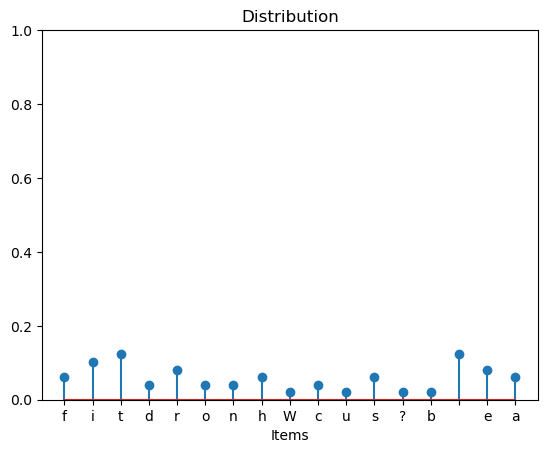

In [17]:
def plot_distribution(seq):
    dist = distribute(seq)
    plt.stem(
        dist.keys(),  # set-like view of the keys
        dist.values(),  # view of the values
    )
    plt.xlabel("Items")
    plt.title("Distribution")
    plt.ylim(0, 1)


plot_distribution("What is the distribution of different characters?")

- The object methods `keys` and `values` provide a dynamic [view](https://docs.python.org/3/glossary.html#term-dictionary-view) of the keys.  
- Unlike a copy, subsequent changes to the dictionary are also reflected in a previously returned view.
- `items` provides a set-like view of the key-value pairs.

In [18]:
%%optlite -h 500
a = dict(enumerate("abc"))
views = a.keys(), a.values(), a.items()
print(a.pop(1))  # remove the key 1 and its associated value
print(a.popitem())  # remove and return one key-value pair
a.clear()  # clear the dictionary

OPTWidget(value=None, height=500, script='a = dict(enumerate("abc"))\nviews = a.keys(), a.values(), a.items()\…

`set` has `pop` and `clear` but not `popitem`. However, `set.pop` behaves like `dict.popitem` instead of `dict.pop`.

In [19]:
%%optlite -h 250
a = set("abc")
print(a.pop())  # remove and return an element
a.clear()  # clear the set

OPTWidget(value=None, height=250, script='a = set("abc")\nprint(a.pop())  # remove and return an element\na.cl…

**Exercise** Use at most one comprehension in one line to return a set of composite numbers smaller than `stop`.  

```{hint}
You do not need to worry about duplicate elements for `set`.
```

In [25]:
def composite_set(stop):
    comp = {*()}
    for i in range(2, stop):
        if i not in comp:
            comp.update({k for k in range(2 * i, stop, i)})
    return comp

print(*sorted(composite_set(100)))

4 6 8 9 10 12 14 15 16 18 20 21 22 24 25 26 27 28 30 32 33 34 35 36 38 39 40 42 44 45 46 48 49 50 51 52 54 55 56 57 58 60 62 63 64 65 66 68 69 70 72 74 75 76 77 78 80 81 82 84 85 86 87 88 90 91 92 93 94 95 96 98 99


## Hashability

Why are some keys missing in the following dictionary/set?

In [26]:
%%optlite -h 350
a = {0: "a", 0.0: "b", 2: "b"}
b = {0j, 0, 0.0, "", False}
assert 0 == 0.0 == 0j == False != ""

OPTWidget(value=None, height=350, script='a = {0: "a", 0.0: "b", 2: "b"}\nb = {0j, 0, 0.0, "", False}\nassert …

```{caution}

For `set` and `dict`, identical keys are merged to the same entry even though values associated with different keys in `dict` can be the same.
```

Associative containers are implemented as *hash tables* for efficient lookup of keys.

In [27]:
%%html
<iframe width="800" height="450" src="https://www.youtube.com/embed/LPzN8jgbnvA" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

```{important}

A key for `dict` or `set` must be a [hashable](https://docs.python.org/3/glossary.html#term-hashable) object which

- has a hash value (returned by `__hash__` method) that never changes during its lifetime, and
- can be compared (using `__eq__` method) to other objects.  
  *Hashable objects which are equal must have the same hash value.*
```

Python also uses dictionaries to implement global/local frames, and [hash collisions can slow down the lookup process](https://stackoverflow.com/questions/8271139/why-is-early-return-slower-than-else).

**What are hashable?**

In [28]:
def hashable(obj):
    try:
        hash(obj)
    except Exception:
        return False
    return True


for i in 0, 0.0, 0j, "", False, (), [], {}, set(), frozenset(), ([],):
    if hashable(i):
        print("{} may be hashable. E.g., hash({!r}) == {}".format(type(i), i, hash(i)))
    else:
        print("{} may not be hashable.".format(type(i)))

<class 'int'> may be hashable. E.g., hash(0) == 0
<class 'float'> may be hashable. E.g., hash(0.0) == 0
<class 'complex'> may be hashable. E.g., hash(0j) == 0
<class 'str'> may be hashable. E.g., hash('') == 0
<class 'bool'> may be hashable. E.g., hash(False) == 0
<class 'tuple'> may be hashable. E.g., hash(()) == 5740354900026072187
<class 'list'> may not be hashable.
<class 'dict'> may not be hashable.
<class 'set'> may not be hashable.
<class 'frozenset'> may be hashable. E.g., hash(frozenset()) == 133146708735736
<class 'tuple'> may not be hashable.


`set` has an immutable counterpart called `frozenset`, which is hashable.

In [29]:
hashable(frozenset())

True

**Why most mutable objects are not hashable?**

Mutating a key makes it a different key, which is [hard to track](https://hynek.me/articles/hashes-and-equality/).

**Why `dict` does not have any immutable counterpart?**

While elements of a set must be hashable and, therefore, often immutable, dictionary values may be of mutable types.

**Exercise** Why must equal objects have the same hash? Why may different objects have the same hash? For example:

In [30]:
assert hash(0) == hash(0.0) == hash(0j) == hash(False) == hash("") and False != ""

YOUR ANSWER HERE

**Exercise** Should an immutable object always be hashable?

YOUR ANSWER HERE

**Exercise** Can we use the `id` of an object as its hash value?

YOUR ANSWER HERE

## Accessing keys/values

**How to traverse a set/dictionary?**

Set and dictionaries are iterable:

In [31]:
%%optlite -h 500
s = set("abcde")
d = dict(enumerate("abcde"))
print(*(element for element in s))
print(*((k, d[k]) for k in d))
s[0]  # TypeError

OPTWidget(value=None, height=500, script='s = set("abcde")\nd = dict(enumerate("abcde"))\nprint(*(element for …

```{note}

- `set` is not ordered.
- `dict` is insertion-ordered since python 3.7.
- `dict` is subscriptable. E.g., `d[k]` gives the value in dictionary `d` associated with key `k`.
- `set` does not implement [`__getitem__`](https://docs.python.org/3/reference/datamodel.html#object.__getitem__) and is therefore not subscriptable.
```

The above raises `KeyError` because `-1` is not a key in the dictionary `b`.

Dictionary implements the [`__setitem__`](https://docs.python.org/3/reference/simple_stmts.html#assignment-statements) method so we can enter a key-value pair to a dictionary using the assignment operator.

In [32]:
%%optlite -h 400
d = {}
d[-1] = d
del d[-1]
d[-1]

OPTWidget(value=None, height=400, script='d = {}\nd[-1] = d\ndel d[-1]\nd[-1]\n')

```{note}

`del d[k]` deletes the object reference at `d[k]`, not the object referenced by `d[k]`. 
```

To avoid `KeyError`, we can check if a key is in a dictionary efficiently (due to hashing) using the `in` operator.  
The following is a different implementation of `distribute`.

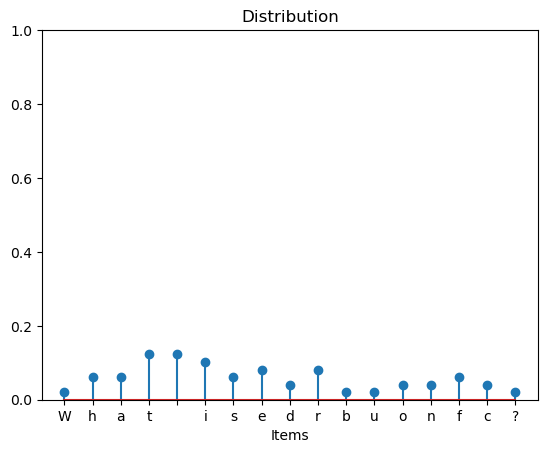

In [33]:
def distribute(seq):
    dist = {}
    for i in seq:
        dist[i] = (dist[i] if i in dist else 0) + 1 / len(seq)
    return dist


plot_distribution("What is the distribution of different characters?")

**Exercise** Unlike the previous implementation using one-line dictionary comprehension, the above alternative implementation uses multiple lines of code to build the dictionary incrementally, starting from an empty dictionary.
```Python
def distribute(seq):
    return {k : seq.count(k)/len(seq) for k in set(seq)}
```
Explain whether the alternative implementation is more efficient.

**Answer**

The previous implementation is more efficient.

**Exercise** `dict` also has a getter method `get` that conveniently returns a default value if the key does not exist. Rewrite the alternative implementation of `distribute` to use `get` instead of `in`.

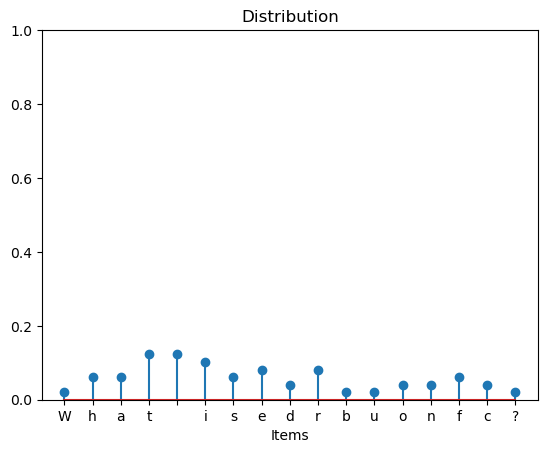

Signature: dict.get(self, key, default=None, /)
Docstring: Return the value for key if key is in the dictionary, else default.
Type:      method_descriptor


In [37]:
dict.get?
def distribute(seq):
    dist = {}
    for i in seq:
        dist[i] = dist.get(i, 0) + 1 / len(seq)
    return dist


plot_distribution("What is the distribution of different characters?")

**How to traverse in ascending order of the keys?**

We can apply the function `sorted` to a set/dictionary to return a sorted list of the keys.

In [38]:
%%optlite -h 600
a = set(reversed("abcde"))
b = dict(reversed([*enumerate("abcde")]))
sorted_elements = sorted(a)
sorted_keys = sorted(b)

OPTWidget(value=None, height=600, script='a = set(reversed("abcde"))\nb = dict(reversed([*enumerate("abcde")])…

**Exercise** Re-implement `plot_distribution` to plot the distribution in ascending order of the keys.

```{hint}
Use the optional argument `key` of the function `sorted`.
```

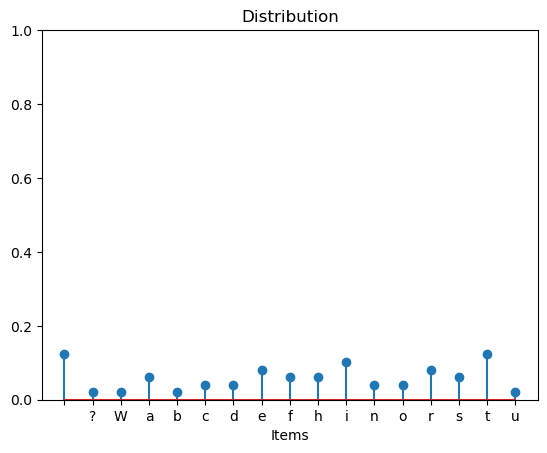

In [42]:
def plot_distribution(seq):
    dist = distribute(seq)
    sorted_keys = sorted(dist)
    # print(sorted_keys)
    new_dist = {i : dist[i] for i in sorted_keys}
    # print(new_dist)
    plt.stem(new_dist.keys(), new_dist.values())
    plt.xlabel("Items")
    plt.title("Distribution")
    plt.ylim(0, 1)


plot_distribution("What is the distribution of different characters?")

**How to add an element to a set and remove an element from it?**

Instead of subscription, `set` has the `add`/`discard`/`remove` methods for adding/removing elements.

In [43]:
%%optlite -h 400
a = set("abc")
a.add("d")
a.discard("a")
a.remove("b")
a.clear()
a.discard("a")  # no error
a.remove("b")  # KeyError

OPTWidget(value=None, height=400, script='a = set("abc")\na.add("d")\na.discard("a")\na.remove("b")\na.clear()…

## Other operators and methods

Unlike `str`/`tuple`/`list`, `set` and `dict` do not implement addition `+` and multiplication `*`:

In [44]:
any(
    hasattr(container, attr)
    for attr in ("__add__", "__mult__")
    for container in (dict, set, frozenset)
)

False

**Exercise** Use the unpacking operators `*` and `**` to concatenate two sets/dictionaries below into a new set/dictionary.

In [48]:
set1 = set("abc")
set2 = set("cde")
concatenated_set = {*set1, *set2}
concatenated_set

{'a', 'b', 'c', 'd', 'e'}

In [49]:
dict1 = dict(enumerate("abc"))
dict2 = dict(enumerate("def", start=2))
concatenated_dict = {**dict1, **dict2}
concatenated_dict

{0: 'a', 1: 'b', 2: 'd', 3: 'e', 4: 'f'}

`set` overloads many other operators:

In [50]:
%%optlite -h 550
a, b = {1, 2}, {2, 3}

union = a | b
assert all(i in union for i in a) and all(i in union for i in b)

intersection = a & b
assert all(i in a and i in b for i in intersection)

assert intersection <= a <= union  # subset
assert union > b > intersection  # proper superset
assert len(a) + len(b) == len(intersection) + len(union)

symmetric_difference = a ^ b
assert all((i in a or i in b) and not (i in a and i in b) for i in symmetric_difference)
assert symmetric_difference == union - intersection
assert set.isdisjoint(intersection, symmetric_difference)
assert len(union) == len(intersection) + len(symmetric_difference)

OPTWidget(value=None, height=550, script='a, b = {1, 2}, {2, 3}\n\nunion = a | b\nassert all(i in union for i …

The following uses `&` and `-` to compare the sets of public attributes for `set` and `dict`:

In [51]:
set_attributes = {attr for attr in dir(set) if attr[0] != "_"}
dict_attributes = {attr for attr in dir(dict) if attr[0] != "_"}
print("Common attributes:", ", ".join(set_attributes & dict_attributes))
print("dict-specific attributes:", ", ".join(dict_attributes - set_attributes))
print("set-specific attributes:", ", ".join(set_attributes - dict_attributes))

Common attributes: copy, clear, pop, update
dict-specific attributes: values, keys, popitem, items, setdefault, get, fromkeys
set-specific attributes: add, isdisjoint, difference_update, remove, issuperset, discard, difference, issubset, intersection, symmetric_difference, symmetric_difference_update, intersection_update, union


For `set`, the intersection operation `&` can also be performed by
- the class method `intersection`, which returns the intersection of its arguments, and
- the object method `intersection_update`, which mutates a set object by intersecting the set with the arguments.

In [52]:
%%optlite -h 300
a = {0, 1, 2}
b = {1, 2, 3}
c = set.intersection(a, b, {2, 3, 4})
a.intersection_update(b, c)

OPTWidget(value=None, height=300, script='a = {0, 1, 2}\nb = {1, 2, 3}\nc = set.intersection(a, b, {2, 3, 4})\…

- All other set-specific methods have an associated operator except `isdisjoint` as shown below.
- The object method for `union` is `update` not `union_update`.

|     class method       |          object method        | operator     |
| ---------------------- | ----------------------------- | ------------ |
| `union`                | `update`                      | `\| `        |
| `intersection`         | `intersection_update`         | `&`          |
| `symmetric_difference` | `symmetric_difference_update` | `^`          |
| `issubset`             |                               | `<=`         |
| `issuperset`           |                               | `>=`         |
| `isdisjoint`           |                               |              |

`dict` also has an `update` method that can update a dictionary using dictionary, iterables, and keyword arguments:

In [53]:
%%optlite -h 300
a = {}
a.update(enumerate("a"), b=2)
b = a.copy()
a.update(b, c=3)

OPTWidget(value=None, height=300, script='a = {}\na.update(enumerate("a"), b=2)\nb = a.copy()\na.update(b, c=3…

**Exercise** For `dict`, there is also a method called [`setdefault`](https://stackoverflow.com/questions/3483520/use-cases-for-the-setdefault-dict-method). Use it to define a function `group_by_type` that 
- takes a sequence `seq` of objects and 
- returns a dictionary `d` such that `d[repr(t)]` returns the list of objects in `seq` of type `t`

If there is no objects of type `t`, raise a `KeyError`.

In [57]:
def group_by_type(seq):
    group = {}
    for i in seq:
        group.setdefault(repr(i), i)
        # print(repr(i))
    return group


group_by_type(
    [
        *range(3),
        *"abc",
        *[i / 2 for i in range(3)],
        *[(i,) for i in range(3)],
        *[[i] for i in range(3)],
        *[{i} for i in range(3)],
        *[{i: i} for i in range(3)],
        print,
        hash,
        int,
        str,
        float,
        set,
        dict,
        (i for i in range(10)),
        enumerate("abc"),
        range(3),
        zip(),
        set.add,
        dict.copy,
    ]
)

{'0': 0,
 '1': 1,
 '2': 2,
 "'a'": 'a',
 "'b'": 'b',
 "'c'": 'c',
 '0.0': 0.0,
 '0.5': 0.5,
 '1.0': 1.0,
 '(0,)': (0,),
 '(1,)': (1,),
 '(2,)': (2,),
 '[0]': [0],
 '[1]': [1],
 '[2]': [2],
 '{0}': {0},
 '{1}': {1},
 '{2}': {2},
 '{0: 0}': {0: 0},
 '{1: 1}': {1: 1},
 '{2: 2}': {2: 2},
 '<built-in function print>': <function print>,
 '<built-in function hash>': <function hash(obj, /)>,
 "<class 'int'>": int,
 "<class 'str'>": str,
 "<class 'float'>": float,
 "<class 'set'>": set,
 "<class 'dict'>": dict,
 '<generator object <genexpr> at 0x7fde79603d10>': <generator object <genexpr> at 0x7fde79603d10>,
 '<enumerate object at 0x7fde791aab80>': <enumerate at 0x7fde791aab80>,
 'range(0, 3)': range(0, 3),
 '<zip object at 0x7fde7917a800>': <zip at 0x7fde7917a800>,
 "<method 'add' of 'set' objects>": <method 'add' of 'set' objects>,
 "<method 'copy' of 'dict' objects>": <method 'copy' of 'dict' objects>}